In [23]:
# Install the required libraries
!pip install prophet

In [102]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [99]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")

display(home_ownership_rate.head()) # How many people owns housing in Hamilton county

,DATE,HOWNRATEACS039061
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [4]:
# This shows the population for Hamilton county
us_census_transposed = us_census.set_index("Fact").transpose()

# x_axis = np.arange(len(us_census))
# plt.bar(x_axis, us_census["Hamilton County, Ohio"], color='r', alpha=0.5, align="edge")
# plt.show()

display(us_census_transposed) 
# plt.plot(us_census_transposed['Fact'], us_census_transposed['Hamilton County, Ohio'])
# plt.show()

Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,"Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Population per square mile, 2010","Land area in square miles, 2020","Land area in square miles, 2010",FIPS Code
"Hamilton County, Ohio",NaN,"825,037",NaN,"830,625",NaN,-0.70%,"830,639","802,374",6.10%,22.60%,...,"2,735","1,150","11,949",846,"12,077","2,048.90","1,976.70",405.41,405.91,"""39061"""


In [5]:
# plt.plot(us_census_transposed['Population Estimates, July 1, 2022, (V2022)'], us_census_transposed['Hamilton County, Ohio'])
# plt.show()

In [7]:
#display(home_value_forecast) # A month-ahead, quarter-ahead and year-ahead forecast of the Zillow Home Value Index (ZHVI)
home_value_forecast_dropped = home_value_forecast.dropna()

display(home_value_forecast_dropped)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,12/31/2023,2/29/2024,11/30/2024
1,394913,1,"New York, NY",msa,NY,11/30/2023,0.1,-0.5,-2.9
2,753899,2,"Los Angeles, CA",msa,CA,11/30/2023,0.3,-1.0,-2.2
3,394463,3,"Chicago, IL",msa,IL,11/30/2023,0.1,-0.3,-2.2
4,394514,4,"Dallas, TX",msa,TX,11/30/2023,-0.2,-0.8,-0.8
5,394692,5,"Houston, TX",msa,TX,11/30/2023,-0.3,-1.1,-2.0
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,11/30/2023,-1.6,-3.9,-9.5
891,394743,936,"Ketchikan, AK",msa,AK,11/30/2023,-0.5,-1.0,-3.8
892,753874,937,"Craig, CO",msa,CO,11/30/2023,0.0,-0.3,1.0
893,395188,938,"Vernon, TX",msa,TX,11/30/2023,-1.3,-2.8,-5.0


In [57]:
home_value_forecast_dropped_columns = home_value_forecast_dropped.drop(columns=['RegionID', 'SizeRank', "RegionType", "StateName", "BaseDate"])
display(home_value_forecast_dropped_columns)

,RegionName,12/31/2023,2/29/2024,11/30/2024
1,"New York, NY",0.1,-0.5,-2.9
2,"Los Angeles, CA",0.3,-1.0,-2.2
3,"Chicago, IL",0.1,-0.3,-2.2
4,"Dallas, TX",-0.2,-0.8,-0.8
5,"Houston, TX",-0.3,-1.1,-2.0
...,...,...,...,...
890,"Zapata, TX",-1.6,-3.9,-9.5
891,"Ketchikan, AK",-0.5,-1.0,-3.8
892,"Craig, CO",0.0,-0.3,1.0
893,"Vernon, TX",-1.3,-2.8,-5.0


<Axes: >

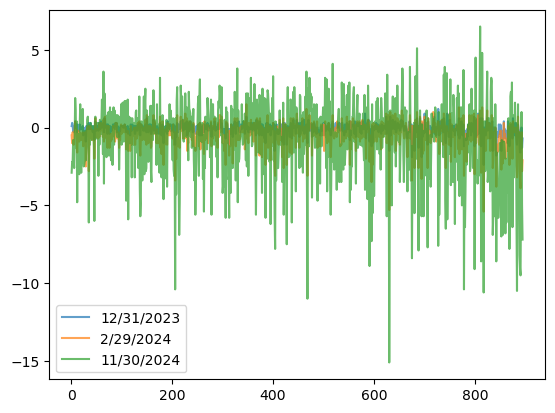

In [11]:
home_value_forecast_dropped_columns.plot(alpha=0.7)

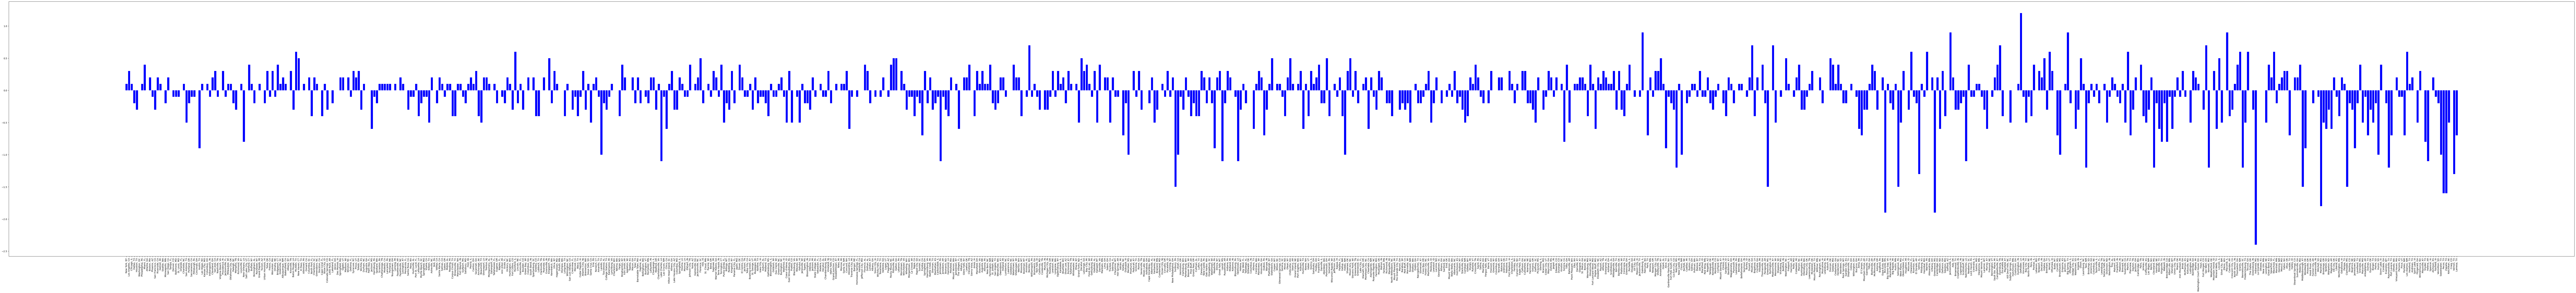

In [42]:
hvf_dropped_columns_month = home_value_forecast_dropped_columns.drop(columns=['2/29/2024', '11/30/2024'])
# display(hvf_dropped_columns_month)

plt.subplots(figsize=(200,20))

x_axis = np.arange(len(hvf_dropped_columns_month['12/31/2023']))
plt.bar(x_axis, hvf_dropped_columns_month['12/31/2023'], color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_dropped_columns_month['RegionName'], rotation="vertical")



# tick_locations = [value+0.4 for value in x_axis]


plt.show()

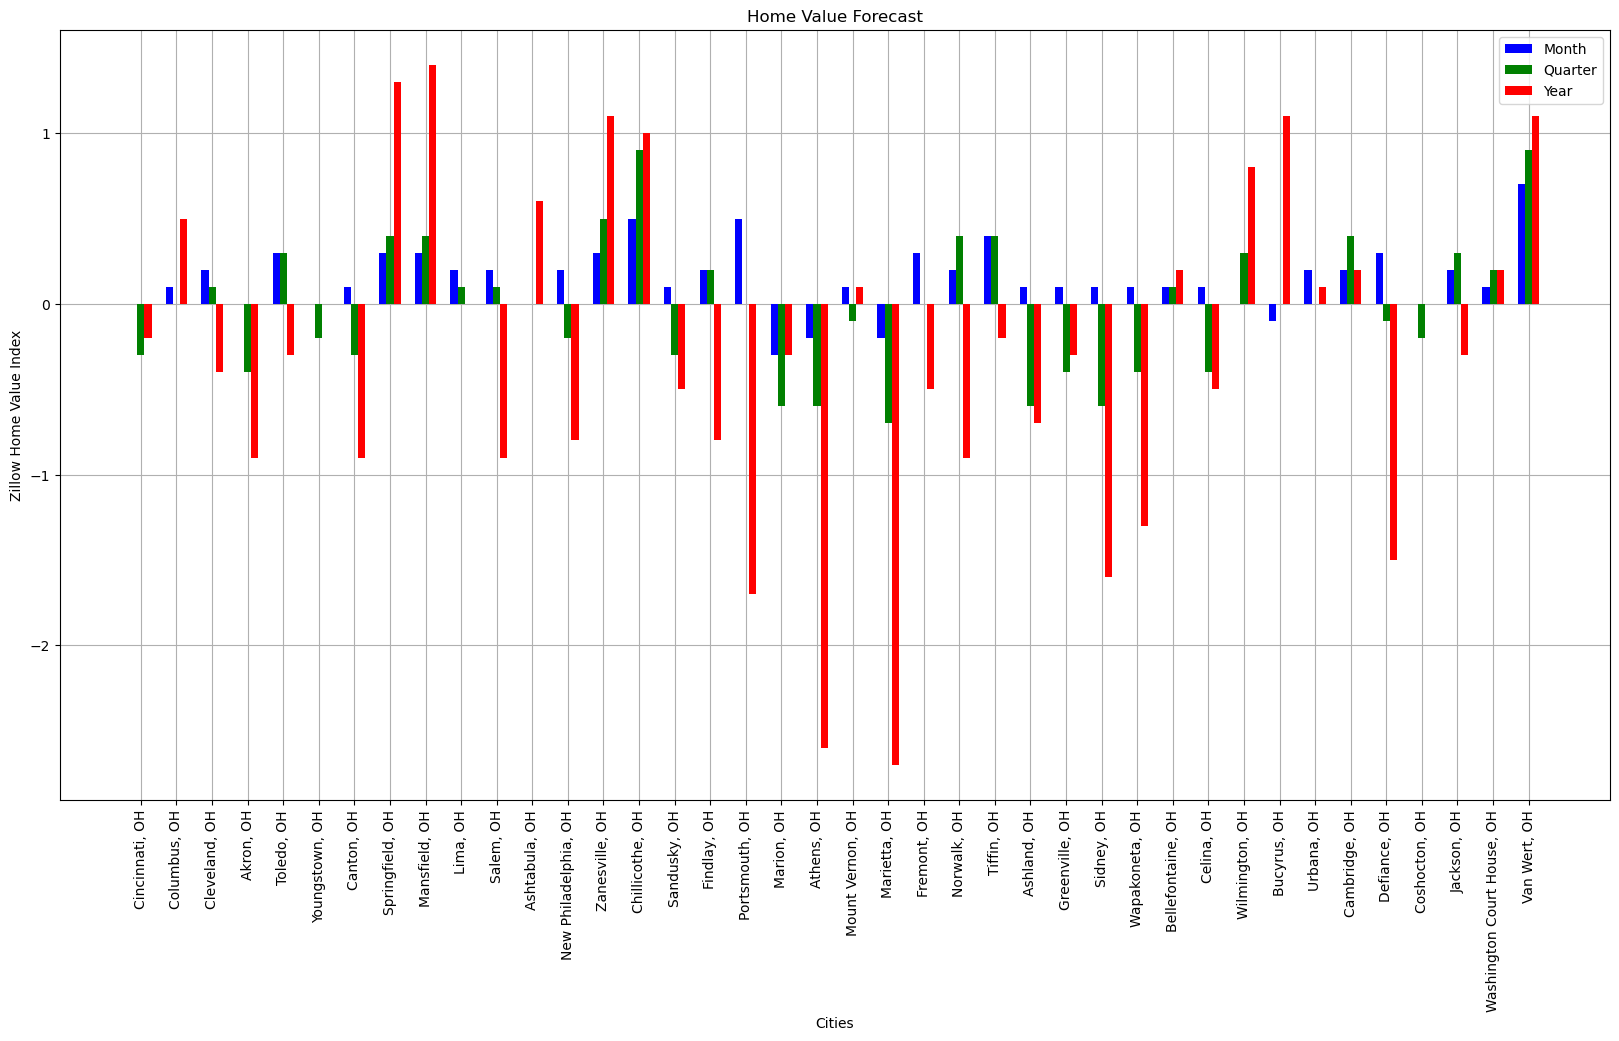

In [140]:
home_value_forecast_dropped_columns['RegionName'] = home_value_forecast_dropped_columns['RegionName'].astype(str)
# hvf_oh = home_value_forecast_dropped_columns.loc[home_value_forecast_dropped_columns['RegionName'] == ", OH"]
# hvf_oh = home_value_forecast_dropped_columns.loc[home_value_forecast_dropped_columns['RegionName'].isin(['OH'])]
hvf_oh = home_value_forecast_dropped_columns[home_value_forecast_dropped_columns['RegionName'].str.endswith('OH')]


# display(hvf_oh)

# print(home_value_forecast_dropped_columns['RegionName'].unique())
# home_value_forecast_dropped_columns.dtypes


plt.subplots(figsize=(20,10))

x_axis = np.arange(len(hvf_oh['12/31/2023']))
plt.bar(x_axis-0.2, hvf_oh['12/31/2023'], color="b", align="center", width=0.2, zorder = 3, label="Month")
plt.bar(x_axis, hvf_oh['2/29/2024'], color="g", align="center", width=0.2, zorder = 3, label="Quarter")
plt.bar(x_axis+0.2, hvf_oh['11/30/2024'], color="r", align="center", width=0.2, zorder = 3, label="Year")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_oh['RegionName'], rotation='vertical')

plt.grid(zorder=0)

plt.title("Home Value Forecast")
plt.xlabel("Cities")
plt.ylabel("Zillow Home Value Index")
plt.legend(loc="best")


plt.show()


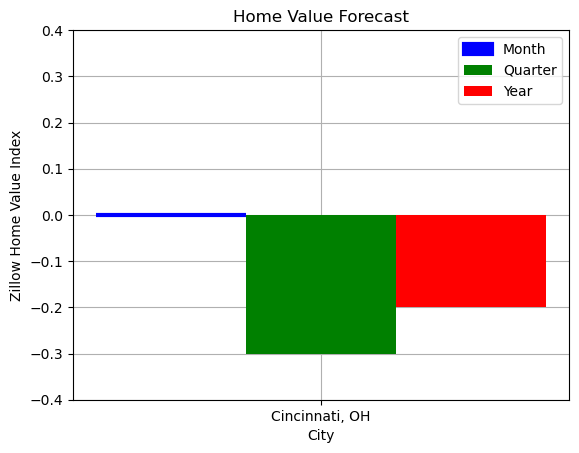

In [147]:
hvf_cincinnati = hvf_oh.loc[hvf_oh['RegionName'] == "Cincinnati, OH"]
# display(hvf_cincinnati)

x_axis = np.arange(len(hvf_cincinnati['12/31/2023']))
plt.bar(x_axis-0.2, hvf_cincinnati['12/31/2023'], color="b", edgecolor='b', linewidth=3, align="center", width=0.2, zorder = 3, label="Month")
plt.bar(x_axis, hvf_cincinnati['2/29/2024'], color="g", align="center", width=0.2, zorder = 3, label="Quarter")
plt.bar(x_axis+0.2, hvf_cincinnati['11/30/2024'], color="r", align="center", width=0.2, zorder = 3, label="Year")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_cincinnati['RegionName'], rotation='horizontal')

plt.grid(zorder=0)

plt.title("Home Value Forecast")
plt.xlabel("City")
plt.ylabel("Zillow Home Value Index")
plt.legend(loc="best")

plt.ylim(-0.40, max(hvf_cincinnati['12/31/2023'])+.40)


plt.show()



In [79]:
hvf_dropped_columns_quarter = home_value_forecast_dropped_columns.drop(columns=['12/31/2023', '11/30/2024'])

# hvf_dropped_columns_quarter = hvf_dropped_columns_quarter.set_index('RegionName')
display(hvf_dropped_columns_quarter)

,RegionName,2/29/2024
1,"New York, NY",-0.5
2,"Los Angeles, CA",-1.0
3,"Chicago, IL",-0.3
4,"Dallas, TX",-0.8
5,"Houston, TX",-1.1
...,...,...
890,"Zapata, TX",-3.9
891,"Ketchikan, AK",-1.0
892,"Craig, CO",-0.3
893,"Vernon, TX",-2.8


In [14]:
hvf_dropped_columns_year = home_value_forecast_dropped_columns.drop(columns=['2/29/2024', '12/31/2023'])
display(hvf_dropped_columns_year)

,RegionName,11/30/2024
1,"New York, NY",-2.9
2,"Los Angeles, CA",-2.2
3,"Chicago, IL",-2.2
4,"Dallas, TX",-0.8
5,"Houston, TX",-2.0
...,...,...
890,"Zapata, TX",-9.5
891,"Ketchikan, AK",-3.8
892,"Craig, CO",1.0
893,"Vernon, TX",-5.0


In [18]:
display(metro_sales_count.head()) # The estimated number of unique properties that sold during the month

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779


In [19]:
display(new_construction_sales.head()) # New houses built

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


In [16]:
display(zestimate.head()) # A mean price of the housing, takes into consideration how prices are appreciating in a particular location

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466
